In [31]:
import pandas as pd
import numpy as np
from random import sample
import random
import scipy.stats as stats

In [32]:
df= pd.read_csv("adult.csv")


#Part 1 - Baysian Aprroach

<div dir="rtl"></br>
קובץ הנתונים שבחרנו הוא:  <b>Adult income dataset</b></br>

שאלת המחקר: </br>
 האם מספר שעות העבודה של אדם בשבוע משתנות בין אם האדם מרוויח פחות מ50k דולרים בשנה או 50k  דולרים ויותר?
</br>

המשתנה הרציף הינו X = hours-per-week
</br>
המשתנה הבינארי הינו Y = income
</div>

In [33]:
#importing
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import t, f, norm, chi2
from matplotlib import colors
from IPython.display import display_html 

In [34]:
#import the data
df=pd.read_csv("adult.csv")

##1

In [35]:
sample = df.sample(n=200, random_state=42)
copy = df.copy()
merge = sample.merge(copy, indicator=True, how='outer')
merge[merge['_merge'] == 'right_only']
df_for_past = merge.drop(columns=["_merge"])
past = df_for_past.sample(n=1000, random_state=27)

##2

In [36]:
𝜏 = np.median(copy["hours-per-week"])
z = lambda hours_per_week: int(hours_per_week > 𝜏)
sample["Z"] = sample["hours-per-week"].apply(z)


###a

In [37]:
def odd_ratio(p):
  return np.log(p/(1-p))

big_income_sample = sample[sample["income"] == ">50K"]
small_income_sample = sample[sample["income"] == "<=50K"]
big_size = big_income_sample.shape[0]
small_size = small_income_sample.shape[0]
p1 = sum(big_income_sample["Z"]) / big_size
p2 = sum(small_income_sample["Z"]) / small_size
Ψ1 = odd_ratio(p1) - odd_ratio(p2)
print(f"Ψ is {Ψ1}")

Ψ is 0.5461862123969734


In [38]:
def quantaile(array, alpha):
    array = sorted(array)
    n = len(array)
    for i, number in enumerate(array):
      if (i + 1) / n >= alpha :
        return number
    return number

n_bootstraps = 1000
values = []
for i in range(n_bootstraps):
    bs_big = big_income_sample.sample(big_size, replace=True, random_state=i)
    bs_small = small_income_sample.sample(small_size, replace=True, random_state=i)
    bs_p1 = sum(bs_big["Z"]) / bs_big.shape[0]
    bs_p2 = sum(bs_small["Z"]) / bs_small.shape[0]
    Ψ2 = odd_ratio(bs_p1) - odd_ratio(bs_p2)
    values.append(Ψ2)
l1 = quantaile(values, 0.025)
h1 = quantaile(values, 0.975)
print(f"Confidence interval based on bootstrap is [{round(l1, 4)}, {round(h1, 4)}]")


Confidence interval based on bootstrap is [-0.2175, 1.2368]


###b

In [39]:
p1 = (sum(big_income_sample["Z"])+1) / (big_size + 2)
p2 = (sum(small_income_sample["Z"])+1) / (small_size + 2)
Ψ3 = odd_ratio(p1) - odd_ratio(p2)
print(f"Ψ is {Ψ3}")

Ψ is 0.5513398786315631


In [40]:
n = 1000
values = []
for i in range(n):
    p1_uni = np.random.beta(sum(big_income_sample["Z"])+1, big_size - sum(big_income_sample["Z"])+1)
    p2_uni = np.random.beta(sum(small_income_sample["Z"])+1, small_size - sum(small_income_sample["Z"])+1)
    Ψ4 = odd_ratio(p1_uni) - odd_ratio(p2_uni)
    values.append(Ψ4)
l2 = quantaile(values, 0.025)
h2 = quantaile(values, 0.975)
print(f"The credible interval is [{round(l2, 4)}, {round(h2, 4)}]")


The credible interval is [-0.204, 1.2086]


###c

In [41]:
big_a, big_b = (sum(big_income_sample["Z"])+0.5, big_size-sum(big_income_sample["Z"])+0.5)
p1_jeffrey = big_a / (big_a + big_b)
small_a, small_b = (sum(small_income_sample["Z"])+0.5, small_size-sum(small_income_sample["Z"])+0.5)
p2_jeffrey = small_a / (small_a + small_b)
Ψ5 = odd_ratio(p1_jeffrey) - odd_ratio(p2_jeffrey)
print(f"Ψ is {Ψ5}")


Ψ is 0.5489277818804106


In [42]:
n = 1000
values = []
for i in range(n):
    p1_jef = np.random.beta(big_a, big_b)
    p2_jef = np.random.beta(small_a, small_b)
    Ψ6 = odd_ratio(p1_jef) - odd_ratio(p2_jef)
    values.append(Ψ6)
l3 = quantaile(values, 0.025)
h3 = quantaile(values, 0.975)
print(f"The credible interval is [{round(l3, 4)}, {round(h3, 4)}]")

The credible interval is [-0.2018, 1.2425]


###d

In [43]:
𝜏 = np.median(copy["hours-per-week"])
z = lambda hours_per_week: int(hours_per_week > 𝜏)
past["Z"] = past["hours-per-week"].apply(z)
big_income_past = past[past["income"] == ">50K"]
small_income_past = past[past["income"] == "<=50K"]
big_past_size = big_income_past.shape[0]
small_past_size = small_income_past.shape[0]
big_a = sum(big_income_sample["Z"]) + sum(big_income_past["Z"]) + 1
big_b = big_size + big_past_size - (sum(big_income_sample["Z"]) + sum(big_income_past["Z"]))
small_a = sum(small_income_sample["Z"]) + sum(small_income_past["Z"]) + 1
small_b = small_size + small_past_size -(sum(small_income_sample["Z"]) + sum(small_income_past["Z"]))
p1_past = big_a / (big_a + big_b)
p2_past = small_a / (small_a + small_b)
Ψ7 = odd_ratio(p1_past) - odd_ratio(p2_past)
print(f"Ψ is {Ψ7}")

Ψ is 0.8144458704413141


In [44]:
n = 1000
values = []
for i in range(n):
    past_p1_sim = np.random.beta(big_a, big_b)
    past_p2_sim = np.random.beta(small_a, small_b)
    Ψ8 = odd_ratio(past_p1_sim) - odd_ratio(past_p2_sim)
    values.append(Ψ8)
l4 = quantaile(values, 0.025)
h4 = quantaile(values, 0.975)
print(f"The credible interval is [{round(l4, 4)}, {round(h4, 4)}]")

The credible interval is [0.5296, 1.0863]


e

<div dir="rtl"></br>
ניתן לראות שהאומדים בסעיפים הראשונים יצאו קרובים אחד לשני באופן יחסי וכולם גדולים מ-0. קיבלנו אומדים מובהקים לכך שההסתברות שמספר שעות העבודה בשבוע עבור אנשים שהרוויחו יותר מ50 אלף דולר בשנה יהיה מעל התאו שבחרנו (חציון), יותר גדולה מההסתברות עבור אנשים שהרוויחו פחות מ50 אלף דולר בשנה.
</div>

#Part 2 - Missing Data


<div dir="rtl">
בחרנו בשלושת המשתנים המסבירים הבאים: גיל (age), מספר השכלה  (educational-num) מתאר את רמת ההשכלה של אדם בסט הנתונים בין 1-16 ורווחי הון (capital-gain).
עבור המשתנה המוסבר בחרנו במספר שעות העבודה השבועיות(hours-per-week) .

</div>

##1

In [45]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from IPython import display
df = pd.read_csv(r'adult.csv')
df['x0']=1
df = df[['x0','age', 'educational-num', 'capital-gain','hours-per-week']]
original_size = df.shape[0]
df.dropna(how='any', inplace=True)
no_null_size = df.shape[0]
df.insert(loc=0, column='intercept', value=1)


In [46]:

sample =df.sample(n=1000, random_state=42)
X_variables = ['x0','age', 'educational-num', 'capital-gain']
y_variable = 'hours-per-week'
X = df[X_variables]
y = df[y_variable]
X_sample = sample[X_variables]
y_sample = sample[y_variable]
beta_dict = {}
MSE_record = []
CI_dict = {"full data":[], "no missing data":[],
 "regression imputation":[], "multiple imputation":[], "IPW":[]}
beta_df = pd.DataFrame(columns = X_variables,index = ["full data", "no missing data",
 "regression imputation", "multiple imputation", "IPW"])

##2

In [47]:
z_alpha = stats.norm.ppf(0.975)
def calculate_beta(X, y):
 # Calculate MLE
 C = X.T @ X
 C_inv = np.linalg.inv(C)
 C_inv_X = C_inv @ X.T
 beta = C_inv_X @ y
 return np.round(beta, 4)

def beta_CI(X, y, beta_sample, X_variables):
 n = X.shape[0]
 p = X.shape[1]
 C = np.linalg.inv(X.T @ X)
 e = y - np.dot(X, beta_sample) #residuals
 res_var_estimate = (1 / (n - p)) * (e.T @ e) #sigma-hat squared
 CI = []
 for i, variable in enumerate(X_variables):
  std_estimate = np.sqrt(res_var_estimate * (C[i][i])) #SE of Beta_i
  CI.append(np.round([beta_sample[i] - z_alpha * std_estimate,
  beta_sample[i] + z_alpha * std_estimate], 4))
 return CI


 
sample_test=sample
sample_test['x0'] = 1
X = sample_test[['x0','age', 'educational-num', 'capital-gain']]
y = sample_test['hours-per-week'].to_numpy()
# 1.a
CI_list=[]
beta_cova = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y) 
# beta_cova =calculate_beta(X,y) 
C=np.linalg.inv(np.dot(X.T, X))
y_cova=np.dot(X,beta_cova)
sigma_square_epsilon=np.sum((y-y_cova)**2)/len(y)
se_vector=[]
for b in range(len(beta_cova)):
  print( f"estimator for the beta {b}: {beta_cova[b]:.6f}")
for i in range(len(beta_cova)):
  se_vector.append(np.sqrt(sigma_square_epsilon*C[i][i]))
for i, b in enumerate(beta_cova):
  CI_list.append((b-2*se_vector[i],b+2*se_vector[i]))
  CI_dict['full data'].append((b-2*se_vector[i],b+2*se_vector[i]))

  print("CI for beta",i ,"is",(b-2*se_vector[i],b+2*se_vector[i]))
beta_dict['full data'] = beta_cova


estimator for the beta 0: 33.755290
estimator for the beta 1: 0.046677
estimator for the beta 2: 0.462504
estimator for the beta 3: 0.000112
CI for beta 0 is (30.170730009695742, 37.33985048067626)
CI for beta 1 is (-0.006977638068682748, 0.10033223718342853)
CI for beta 2 is (0.1689943771545872, 0.7560145372367602)
CI for beta 3 is (2.3723199671409686e-06, 0.0002208899318341394)


##3

In [48]:
# df_modified = sample.copy()

def probability_function(value):
    return value / 500

# Create a Bernoulli variable to select the values to replace with NAN
p = sample['hours-per-week'].apply(probability_function)
selected_index = np.random.choice(sample.index, size=500, p=p/p.sum(), replace=False)

# Replace the selected values with NAN
sample.loc[selected_index, 'hours-per-week'] = np.nan
inntial_sample=sample.copy()


##4.

###a

In [49]:
sample_clean=sample.dropna()


In [50]:




X_missing = X_sample[sample['hours-per-week'].isnull()==False]
y_missing = y_sample[sample['hours-per-week'].isnull()==False]
beta_missing = calculate_beta(X_missing, y_missing).to_numpy()
CI_missing = beta_CI(X_missing, y_missing, beta_missing, X_variables)
print(f'Beta = {beta_missing}')
for i in range(beta_missing.size):
 CI_dict['no missing data'].append(CI_missing[i])
 print(f"CI for beta_{i} is: {CI_missing[i]}")
beta_dict['seen data'] = beta_missing



Beta = [2.92438e+01 3.50000e-02 7.43300e-01 1.00000e-04]
CI for beta_0 is: [24.2406 34.247 ]
CI for beta_1 is: [-0.0391  0.1091]
CI for beta_2 is: [0.3252 1.1614]
CI for beta_3 is: [-0.0001  0.0003]


###b

In [51]:
# calculating beta hat using the not missing data features
# using the beta hat form the prevuies section to predict the missing data in "hours-per-week"
regression_imnputation_df=sample

# regression_imnputation_df = sample.apply(lambda x: x.fillna(np.dot(X,beta_cova)), axis=1)
regression_imnputation_df['hours-per-week'] = regression_imnputation_df.apply(lambda x: x['x0']*beta_cova[0]+
                  x['age']*beta_cova[1]+x['educational-num']*beta_cova[2]+x['capital-gain']*beta_cova[3] 
                  if np.isnan(x['hours-per-week']) else x['hours-per-week'], axis=1)
sample_test=regression_imnputation_df.copy()
sample_test['x0'] = 1
X = sample_test[['x0','age', 'educational-num', 'capital-gain']]
y = sample_test['hours-per-week'].to_numpy()
beta_cova = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y) 
print("the estimators for beta hat is:", beta_cova)
C=np.linalg.inv(np.dot(X.T, X))
y_cova=np.dot(X,beta_cova)
sigma_square_epsilon=np.sum((y-y_cova)**2)/len(y)
se_vector=[]
for i in range(len(beta_cova)):
  se_vector.append(np.sqrt(sigma_square_epsilon*C[i][i]))
for i, b in enumerate(beta_cova):
  print("CI for beta",i ,"is",(b-2*se_vector[i],b+2*se_vector[i]))
  CI_dict['regression imputation'].append((b-2*se_vector[i],b+2*se_vector[i]))
beta_dict['regression imputation'] = beta_cova


the estimators for beta hat is: [3.13765409e+01 4.00132098e-02 6.18022272e-01 8.41005402e-05]
CI for beta 0 is (28.726096534988233, 34.02698527633123)
CI for beta 1 is (0.00034044161591158945, 0.07968597805394531)
CI for beta 2 is (0.40099923728450604, 0.8350453061316884)
CI for beta 3 is (3.3139532450406284e-06, 0.0001648871271398999)


In [52]:
argsort_y = np.argsort(sample['hours-per-week'])
hours_missing = []
for record, idx in zip(sample['hours-per-week'], argsort_y):
 p = 0.2 + (0.0006 * idx)
 missing = np.random.binomial(1, p)
 if missing == 0:
   hours_missing.append(record)
 else:
   hours_missing.append(None)
sample['hours_missing'] = hours_missing

###C

In [53]:
#multiple imputation using M=100 
import statsmodels.api as sm



M=100


X_test = sample_test[['x0','age', 'educational-num', 'capital-gain']]
y_test = sample_test['hours-per-week'].to_numpy()
noise = np.random.normal(0, 1, size=M)
Y_i=[]

full_model = sm.OLS(y_test,X_test).fit()
multiple_imputation_df=sample.copy()


# noise = np.random.normal(0, 1, size=M)
X = pd.DataFrame(X)


sd_estimator = full_model.mse_resid**0.5
beta_mat = []
Ylist=[]
var_mat = np.zeros((M,4))
C = np.linalg.inv(X.T @ X)
for m in range(M):
  tmp = [np.random.normal(np.dot(X.iloc[i],full_model.params), sd_estimator, size=1)[0] if pd.isnull(sample['hours_missing'].iloc[i])
   else sample['hours_missing'].iloc[i] for i in range(len(X))]

  hours_mul = np.array(tmp)
  
  model = sm.OLS(hours_mul,X).fit()
  for i in range(4):
     var_mat[m][i] = model.mse_resid * C[i][i]
  beta_mat.append(model.params)
beta_multiple = np.average(beta_mat,axis=0)
print(" beta estimator based on multiple imputation")
print(f'{beta_multiple} ') # the other way
beta_dict['multiple imputation'] = beta_multiple


 beta estimator based on multiple imputation
[3.23337411e+01 1.86077032e-02 5.84809894e-01 9.21739637e-05] 


###d

In [54]:
# # # need to be completed
X = multiple_imputation_df[['x0','age', 'educational-num', 'capital-gain']]


rubin_var = np.zeros(4)
beta_mat_avg = np.average(var_mat,axis=0)
beta_difference = np.average((beta_mat - beta_multiple)**2,axis=0)
for i in range(4):
 rubin_var[i] = beta_mat_avg[i] + ((M+1)/(M-1))*beta_difference[i]
print(f'{rubin_var} = Rubin variance for beta')
print(f'{np.round(beta_multiple,2)} = beta estimator based on multiple imputation') # th
for i in range(4):
 CI = np.round([beta_multiple[i] - z_alpha*np.sqrt(rubin_var[0]),
 beta_multiple[i] + z_alpha*np.sqrt(rubin_var[1])],2)
 print(f'CI for beta {i} with se based on Rubin variance: {CI}')
 CI_dict['multiple imputation'].append(CI)



[2.83854281e+00 5.94226085e-04 1.78627560e-02 3.23503675e-09] = Rubin variance for beta
[3.233e+01 2.000e-02 5.800e-01 0.000e+00] = beta estimator based on multiple imputation
CI for beta 0 with se based on Rubin variance: [29.03 32.38]
CI for beta 1 with se based on Rubin variance: [-3.28  0.07]
CI for beta 2 with se based on Rubin variance: [-2.72  0.63]
CI for beta 3 with se based on Rubin variance: [-3.3   0.05]


###e

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# transfirm missing data to binary
inntial_sample['x0'] = 1

X = inntial_sample[['x0', 'age', 'educational-num', 'capital-gain']].to_numpy()

inntial_sample["missing"] = np.where(np.isnan(inntial_sample["hours-per-week"]), 0, 1)

y = inntial_sample['missing'].to_numpy()


reg=LogisticRegression(penalty='none',fit_intercept=False).fit(X,y)
# Predict the probability of missing data for each variable in the data
missing_prob = reg.predict_proba(X)[:,1]

# Find the general probability of missing data
general_prob = missing_prob.mean()

# Predict the probability of missing data for each variable in the test data
general_prob

0.4996045187650044

In [56]:
from sklearn.linear_model import LogisticRegression

X = inntial_sample[['x0', 'age', 'educational-num', 'capital-gain']].to_numpy()
y = inntial_sample['missing'].to_numpy()
reg=LogisticRegression(penalty='none',fit_intercept=False).fit(X,y)
betas=reg.coef_
probabilty= 1 / (1 + np.exp(-np.dot(X,betas.T)))
print(probabilty.mean())



0.4996045187650044


###f

In [57]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.utils import resample
focus_df=inntial_sample[['x0', 'age', 'educational-num', 'capital-gain','missing']]
# load data into a pandas dataframe
log_reg = LogisticRegression()
log_reg.fit(inntial_sample[['x0', 'age', 'educational-num', 'capital-gain']], inntial_sample['missing'])
inntial_sample["missing"] = np.where(np.isnan(inntial_sample["hours-per-week"]), 1, 0)

# calculate weights
weights = 1 / log_reg.predict_proba(inntial_sample[['x0', 'age', 'educational-num', 'capital-gain']])[:,1]

# fit weighted linear regression model
lin_reg = LinearRegression()
lin_reg.fit(inntial_sample.loc[inntial_sample['missing'] == 0, ['x0', 'age', 'educational-num', 'capital-gain']], 
            inntial_sample.loc[inntial_sample['missing'] == 0, 'hours-per-week'], 
            sample_weight=weights[inntial_sample['missing'] == 0])

# print IPW estimators for linear regression coefficients
print(f"estimator for beta {0}: {lin_reg.intercept_:.6f} ")
beta_IPW=[]
beta_IPW.append(lin_reg.intercept_)
for i in range(1,len(lin_reg.coef_)):
    print(f"estimator for beta {i}: {lin_reg.coef_[i]:.6f}")
    beta_IPW.append(lin_reg.coef_[i]) 

beta_dict['IPW'] = beta_IPW





estimator for beta 0: 29.247794 
estimator for beta 1: 0.034941
estimator for beta 2: 0.743262
estimator for beta 3: 0.000060


##g

In [58]:
from sklearn.utils import resample

# fit linear regression model on original data


# number of bootstrap samples
n_samples = 100
X=inntial_sample.loc[inntial_sample['missing'] == 0, ['x0', 'age', 'educational-num', 'capital-gain']]
y=inntial_sample.loc[inntial_sample['missing'] == 0, 'hours-per-week']
# create empty array to store bootstrap samples
coefs_bootstrap = np.zeros((n_samples, len(lin_reg.coef_)))
intercept_bootsrap=[]
# perform bootstrap
for i in range(n_samples):
    X_resample, y_resample = resample(X, y)
    lin_reg_resample = LinearRegression()
    weights = 1 / log_reg.predict_proba(X_resample[['x0', 'age', 'educational-num', 'capital-gain']])[:,1]
    lin_reg_resample.fit(X_resample, y_resample,sample_weight=weights)
    coefs_bootstrap[i, :] = lin_reg_resample.coef_
    intercept_bootsrap.append(lin_reg_resample.intercept_)

# calculate lower and upper bounds of CI
alpha = 0.05
lower = np.percentile(coefs_bootstrap, 0.025, axis=0)
upper = np.percentile(coefs_bootstrap, 0.975, axis=0)
lower_intercept = np.percentile(intercept_bootsrap, (alpha/2)*100, axis=0)
upper_intercept = np.percentile(intercept_bootsrap, (1-alpha/2)*100, axis=0)

# print CI
print(f" beta {0}:  (CI: {lower_intercept:.6f}, {upper_intercept:.6f})")
CI_dict['IPW'].append((lower_intercept,upper_intercept))

for i in range(1,len(lin_reg.coef_)):
    print(f" beta {i}:(CI: {lower[i]:.6f}, {upper[i]:.6f})")
    CI_dict['IPW'].append((lower[i],upper[i]))


 beta 0:  (CI: 23.260833, 33.759006)
 beta 1:(CI: -0.088940, -0.078536)
 beta 2:(CI: 0.146576, 0.194248)
 beta 3:(CI: -0.000008, 0.000001)


In [59]:
beta_df = pd.DataFrame(columns = X_variables,index = ["full data", "no missing data",
                                                      "regression imputation", "multiple imputation", "IPW"])
for ind, key in zip(beta_df.index,beta_dict.keys()):
 beta_df.loc[ind] = beta_dict[key]
beta_df


,x0,age,educational-num,capital-gain
full data,33.75529,0.046677,0.462504,0.000112
no missing data,29.2438,0.035,0.7433,0.0001
regression imputation,31.376541,0.040013,0.618022,0.000084
multiple imputation,32.333741,0.018608,0.58481,0.000092
IPW,29.247794,0.034941,0.743262,0.00006


<div dir="rtl">
ניתן לראות שהאומדים קרובים אחד לשני אך לא בצורה מדויקת , ניתן להסיק מכך שהנתונים שלא היו חסרים אינם משקפים את הדאטא במלואו
</div>

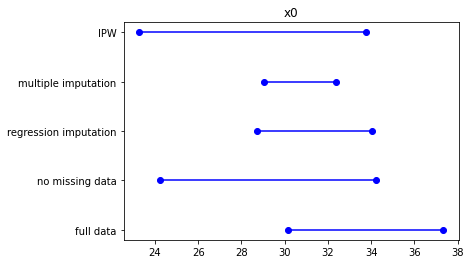

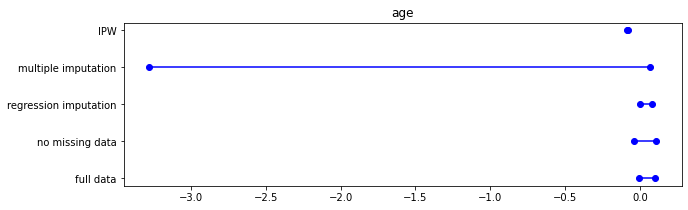

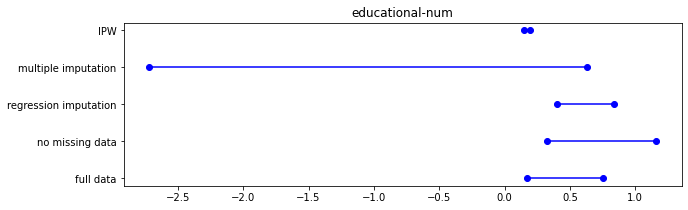

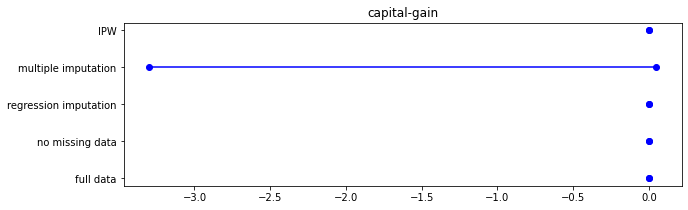

<Figure size 720x216 with 0 Axes>

In [60]:
questions = ["full data", "no missing data", "regression imputation", "multiple imputation","IPW"]
for i, beta in enumerate(X_variables):
 for name, key, y in zip(questions, CI_dict.keys(), [k for k in range(len(questions))]):
   plt.plot((CI_dict[key][i][0], CI_dict[key][i][1]), (y,y), 'ro-', color = "blue")
 plt.title(beta)
 plt.yticks(range(len(questions)), questions)
 plt.show()
 plt.figure(figsize=(10,3))

<div dir="rtl">
 רוב רווחי הסמך מכילים את הפרמטר האמיתי וחלקם לא כתוצאה מהטיה עקב שימוש במודלים להשלמת ערכים חסרים שמבוססים על רשומות שאינן משקפות את השונות בדאטא
</div>